# Dynamic Profile Scrape 
In this example, we will subclass and extend instascrape.Profile to dynamically scrape all the posts of a profile using Selenium. Additionally, all posts will be loaded as instascrape.Post objects which will give us all the data we need to know about the posts for us to get a good picture of a pages engagement.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

from dynamic_profile import DynamicProfile

### Scraping the data 
First, we'll start by scraping the data with our DynamicProfile subclass of instascrape.Profile. To get an understanding of how this class works, go take a look at it's source in dynamic_profile.py included in this folder. For the purpose of this exercise, it will make requests synchronously but if you wanted to speed it up, you could rewrite this asynchrounously.

In [2]:
username = 'realpython'
profile = DynamicProfile.from_username(username)
profile.static_load()
profile.dynamic_load()

0
10
20
30
40
50
60
70
80
90
'entry_data'
100
110
120
130
140
150
160
'entry_data'
170
180
'entry_data'
190
200
210
220
230
240


### Plotting the data 
Now that the data has been scraped, we can get into analyzing it! Let's clean it up a little, create a DataFrame, and get going with plotting this data.

In [9]:
data_arr = []
for post in profile.posts:
    try:
        data_arr.append((post.data.upload_date, post.data.likes))
    except AttributeError: 
        pass 
columns = ['datetime', 'likes']
dataframe = pd.DataFrame(data_arr, columns=columns)
dataframe = dataframe.sort_values(by=['datetime']).reset_index(drop=False)
dataframe.iloc[-10:]

,index,datetime,likes
232,9,2020-08-25 10:20:07,121
233,8,2020-08-27 10:20:05,75
234,7,2020-09-01 10:20:06,72
235,6,2020-09-03 10:20:05,64
236,5,2020-09-08 10:20:07,90
237,4,2020-09-10 10:20:09,70
238,3,2020-09-15 10:20:06,86
239,2,2020-09-17 10:20:11,60
240,1,2020-09-22 10:20:06,79
241,0,2020-09-24 10:20:06,74


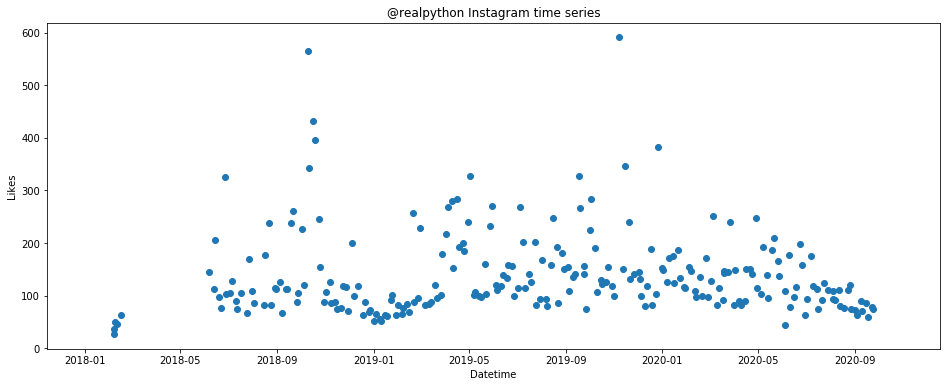

In [19]:
from pandas.plotting import register_matplotlib_converters
plt.scatter(dataframe['datetime'], dataframe['likes'])
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.xlabel('Datetime')
plt.ylabel('Likes')
plt.title(f'@{username} Instagram time series')
# plt.legend(loc="upper left")
plt.show()